# 1 Installation

In [1]:
# NLP
! python -m pip install nltk==3.5
! python -m pip install numpy matplotlib

# MDAnalysis
! pip install --upgrade MDAnalysis
! pip install --upgrade MDAnalysisTests
! pip install --upgrade MDAnalysisData

# mdtraj, nglview, cython, pytraj, tsplot
# gnuplot, prody
! pip install mdtraj
! pip install nglview
! pip install cython --upgrade
! pip install pytraj
! pip install tsplot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434678 sha256=d712ddf7d8f6b2f45011ed64af37dc7628940411850b593b3f8a2b393678e6c4
  Stored in directory: /root/.cache/pip/wheels/35/ab/82/f9667f6f884d272670a15382599a9c753a1dfdc83f7412e37d
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 55.3 MB/s eta 0:00:00
    

# 2 Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#Let's make a folder first. We need to import the os and path library
import os
from pathlib import Path 

#Then, we define the path of the folder we want to create.
#Notice that the HOME folder for a hosted runtime in colab is /content/
mdpath = Path("/content")
#mdpath = Path("/content")


#Now, we create the folder using the os.mkdir() command
#The if conditional is just to check whether the folder already exists
#In which case, python returns an error
if os.path.exists(mdpath):
  print("path already exists")
if not os.path.exists(mdpath):
  os.mkdir(mdpath)
  print("path was succesfully created")

# Change path
#First, we will change to the new folder. We will use python now :)
os.chdir(mdpath)

path already exists


# Untar loaded trajectories

In [ ]:
# Where am I?
! pwd

/content/gdrive/MyDrive/works/psmb8/3unf


In [ ]:
#!tar -xzf 3unf-g210v-100-10.tar.gz

# Fundamental Dynamics (Single Trajectory)

## RMSD (single traj)

In [24]:
import MDAnalysis as mda
# load the trajectory and topology files
u = mda.Universe('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/md_1_all.xtc')

# select protein atoms for analysis
protein = u.select_atoms('protein')

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms
import matplotlib.pyplot as plt

# load the trajectory and topology files
u = mda.Universe('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/md_1_all.xtc')

# calculate the RMSD
ref = u.select_atoms('protein')
R = rms.RMSD(u, ref, select='backbone', groupselections=['protein'])
R.run()

# plot the RMSD
plt.plot(R.rmsd[:,1], R.rmsd[:,2])
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (Å)')

# save the plot as a PNG file
plt.savefig('rmsd_plot.png', dpi=300)

# show the plot
plt.show()


## RMSF CA (single traj)

In [ ]:
# rmsf ;  c-alpha
import MDAnalysis as mda
from MDAnalysis.analysis import rms
import numpy as np
import matplotlib.pyplot as plt

# load the trajectory and topology files
u = mda.Universe('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/md_1_all.xtc')

# select C-alpha atoms for analysis
calpha = u.select_atoms('protein and name CA')

# calculate the RMSF
R = rms.RMSF(calpha, C_alpha=True).run()
rmsf_analysis = R.rmsf

# plot the RMSF
plt.plot(rmsf_analysis)
plt.xlabel('Residue')
plt.ylabel('RMSF (Å)')

# save the plot as a PNG file
plt.savefig('rmsf_ca_plot.png', dpi=300)

# show the plot
plt.show()


## RG (single traj)

In [ ]:
#Rg
# load the trajectory and topology files
u = mda.Universe('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/md_1_all.xtc')

# select protein atoms for analysis
protein = u.select_atoms('protein')

# calculate the radius of gyration
com = np.array([protein.center_of_mass()])
Rg_list = []
for ts in u.trajectory:
    Rg = np.sqrt(np.sum((protein.positions - com)**2)/len(protein))
    Rg_list.append(Rg)

# plot the radius of gyration
plt.plot(np.arange(len(Rg_list)), Rg_list)
plt.xlabel('Time (frames)')
plt.ylabel('Radius of gyration (Å)')


# save the plot as a PNG file
plt.savefig('rg_plot.png', dpi=300)

# show the plot
plt.show()


In [ ]:
#Rg
# load the trajectory and topology files
u = mda.Universe('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/md_1_all.xtc')

# select protein atoms for analysis
protein = u.select_atoms('protein')

# calculate the radius of gyration
com = np.array([protein.center_of_mass()])
Rg_list = []
time_list = []
for ts in u.trajectory:
    Rg = np.sqrt(np.sum((protein.positions - com)**2)/len(protein))
    Rg_list.append(Rg)
    time_list.append(ts.time)

# plot the radius of gyration
plt.plot(time_list, Rg_list)
plt.xlabel('Time (ps)')
plt.ylabel('Radius of gyration (Å)')

# save the plot as a PNG file
plt.savefig('rg_plot.png', dpi=300)

# show the plot
plt.show()


# 3 Fundamental Dynamics (two trajectories)
RMSD RMSF RG

## 3.1 RMSD

/usr/local/lib/python3.10/dist-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


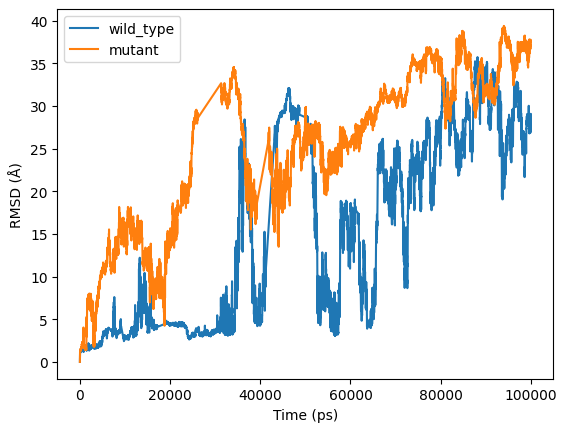

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms
import matplotlib.pyplot as plt

# load the trajectories and topologies
u1 = mda.Universe('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/md_1_all.xtc')
u2 = mda.Universe('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/md_1_all.xtc')

# select the protein atoms for RMSD calculation
ref1 = u1.select_atoms('protein')
ref2 = u2.select_atoms('protein')

# calculate the RMSD
R1 = rms.RMSD(u1, ref1, select='backbone', groupselections=['protein'])
R1.run()
R2 = rms.RMSD(u2, ref2, select='backbone', groupselections=['protein'])
R2.run()

# plot the RMSD
fig, ax = plt.subplots()
ax.plot(R1.rmsd[:,1], R1.rmsd[:,2], label='wild_type')
ax.plot(R2.rmsd[:,1], R2.rmsd[:,2], label='mutant')
ax.legend()
ax.set_xlabel('Time (ps)')
ax.set_ylabel('RMSD (Å)')

# save the plot as a PNG file
plt.savefig('rmsd_plot_230425.png', dpi=300)

# show the plot
plt.show()


## 3.2 RMSF CA

/usr/local/lib/python3.10/dist-packages/MDAnalysis/analysis/rms.py:887: DeprecationWarning: The `rmsf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


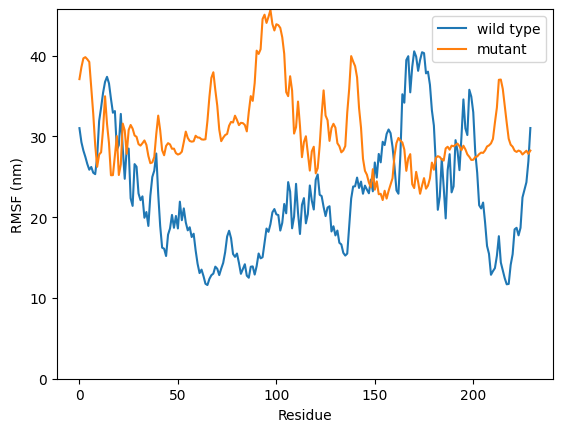

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms
from MDAnalysis.analysis.rms import RMSF
import matplotlib.pyplot as plt

# Load the two trajectory and topology files
u1 = mda.Universe('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/md_1_all.xtc')
u2 = mda.Universe('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/md_1_all.xtc')

# Select the C-alpha atoms
calpha1 = u1.select_atoms('protein and name CA')
calpha2 = u2.select_atoms('protein and name CA')

# Align the protein to the reference structure
ref1 = mda.Universe('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/6wzu_solv_ions.pdb')
ref2 = mda.Universe('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/6wzu_solv_ions.pdb')
R1 = rms.RMSD(u1, ref1, select='protein and name CA', center=True, superposition=True)
R1.run()
R2 = rms.RMSD(u2, ref2, select='protein and name CA', center=True, superposition=True)
R2.run()

# Calculate RMSF for each trajectory
RMSF1 = RMSF(calpha1).run()
RMSF2 = RMSF(calpha2).run()

# Plot RMSF values of both trajectories on the same plot
fig, ax = plt.subplots()
ax.plot(RMSF1.rmsf, label='wild type')
ax.plot(RMSF2.rmsf, label='mutant')
ax.set_xlabel('Residue')
ax.set_ylabel('RMSF (nm)')
ax.legend()

# Set the y-axis limits based on the range of your RMSF values
ymin = 0
ymax = max(RMSF1.rmsf.max(), RMSF2.rmsf.max()) + 0.1
ax.set_ylim(ymin, ymax)

# Save the plot as a high-resolution PNG image
fig.savefig('rmsf_ca_230425.png', dpi=300)

plt.show()


## 3.3 RG

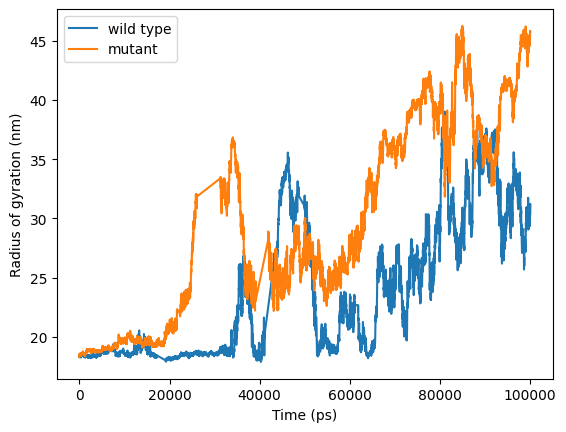

In [ ]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory and topology files for both systems
u1 = mda.Universe('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/md_1_all.xtc')
u2 = mda.Universe('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/md_1_all.xtc')

# Select only protein atoms
protein_sel1 = u1.select_atoms('protein')
protein_sel2 = u2.select_atoms('protein')

# Initialize arrays to store Rg values and time
Rg1 = np.zeros(len(u1.trajectory))
Rg2 = np.zeros(len(u2.trajectory))
time1 = np.zeros(len(u1.trajectory))
time2 = np.zeros(len(u2.trajectory))

# Loop over all frames in trajectory and calculate Rg
for ts in u1.trajectory:
    Rg1[ts.frame] = protein_sel1.radius_of_gyration()
    time1[ts.frame] = u1.trajectory.time

for ts in u2.trajectory:
    Rg2[ts.frame] = protein_sel2.radius_of_gyration()
    time2[ts.frame] = u2.trajectory.time

# Plot Rg values of both systems on the same plot
fig, ax = plt.subplots()
ax.plot(time1, Rg1, label='wild type')
ax.plot(time2, Rg2, label='mutant')
ax.set_xlabel('Time (ps)')
ax.set_ylabel('Radius of gyration (nm)')
ax.legend()

# Save the plot as a high-resolution PNG image
fig.savefig('rg_230425.png', dpi=300)

plt.show()


# Fundamental Dynamics (four Trajectories)

## RMSD

/usr/local/lib/python3.10/dist-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


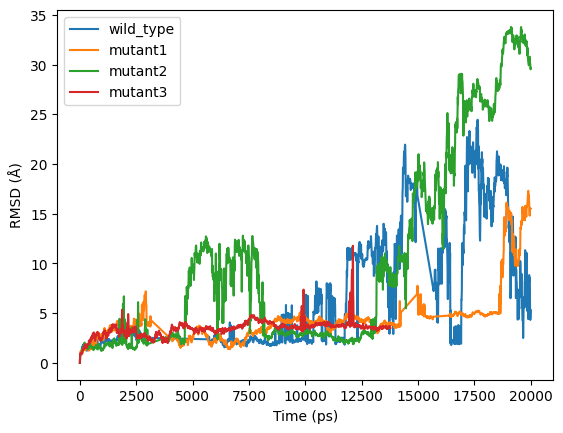

In [6]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms
import matplotlib.pyplot as plt

# Load the trajectories and topologies
u1 = mda.Universe('/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-wt-20ns/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-wt-20ns/md_1_all.xtc')
u2 = mda.Universe('/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-q8c-20ns/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-q8c-20ns/md_1_all.xtc')
u3 = mda.Universe('/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-r67c-20ns/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-r67c-20ns/md_1_all.xtc')
u4 = mda.Universe('/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-n84c-20ns/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-n84c-20ns/md_1_all.xtc')

# Select the protein atoms for RMSD calculation
ref1 = u1.select_atoms('protein')
ref2 = u2.select_atoms('protein')
ref3 = u3.select_atoms('protein')
ref4 = u4.select_atoms('protein')

# Calculate the RMSD
R1 = rms.RMSD(u1, ref1, select='backbone', groupselections=['protein'])
R1.run()
R2 = rms.RMSD(u2, ref2, select='backbone', groupselections=['protein'])
R2.run()
R3 = rms.RMSD(u3, ref3, select='backbone', groupselections=['protein'])
R3.run()
R4 = rms.RMSD(u4, ref4, select='backbone', groupselections=['protein'])
R4.run()

# Plot the RMSD
fig, ax = plt.subplots()
ax.plot(R1.rmsd[:, 1], R1.rmsd[:, 2], label='wild_type')
ax.plot(R2.rmsd[:, 1], R2.rmsd[:, 2], label='mutant1')
ax.plot(R3.rmsd[:, 1], R3.rmsd[:, 2], label='mutant2')
ax.plot(R4.rmsd[:, 1], R4.rmsd[:, 2], label='mutant3')
ax.legend()
ax.set_xlabel('Time (ps)')
ax.set_ylabel('RMSD (Å)')

# Save the plot as a PNG file
plt.savefig('rmsd_plot.png', dpi=300)

# Show the plot
plt.show()


## RMSF CA

/usr/local/lib/python3.10/dist-packages/MDAnalysis/analysis/rms.py:891: DeprecationWarning: The `rmsf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


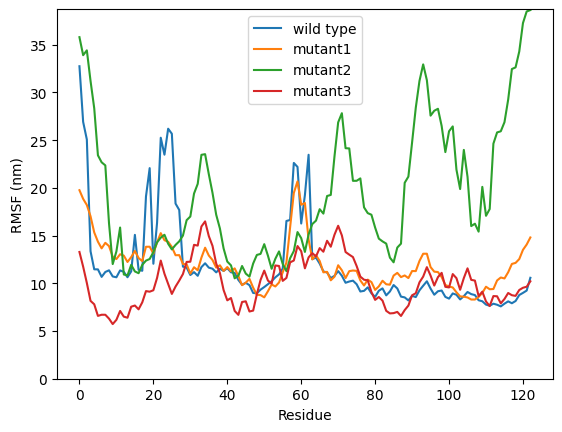

In [7]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms
from MDAnalysis.analysis.rms import RMSF
import matplotlib.pyplot as plt

# Load the trajectories and topologies
u1 = mda.Universe('/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-wt-20ns/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-wt-20ns/md_1_all.xtc')
u2 = mda.Universe('/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-q8c-20ns/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-q8c-20ns/md_1_all.xtc')
u3 = mda.Universe('/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-r67c-20ns/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-r67c-20ns/md_1_all.xtc')
u4 = mda.Universe('/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-n84c-20ns/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-n84c-20ns/md_1_all.xtc')

# Select the C-alpha atoms
calpha1 = u1.select_atoms('protein and name CA')
calpha2 = u2.select_atoms('protein and name CA')
calpha3 = u3.select_atoms('protein and name CA')
calpha4 = u4.select_atoms('protein and name CA')

# Align the protein to the reference structure
ref1 = mda.Universe('/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-wt-20ns/6wzu_solv_ions.pdb')
ref2 = mda.Universe('/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-q8c-20ns/6wzu_solv_ions.pdb')
ref3 = mda.Universe('/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-r67c-20ns/6wzu_solv_ions.pdb')
ref4 = mda.Universe('/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-n84c-20ns/6wzu_solv_ions.pdb')
R1 = rms.RMSD(u1, ref1, select='protein and name CA', center=True, superposition=True)
R1.run()
R2 = rms.RMSD(u2, ref2, select='protein and name CA', center=True, superposition=True)
R2.run()
R3 = rms.RMSD(u3, ref3, select='protein and name CA', center=True, superposition=True)
R3.run()
R4 = rms.RMSD(u4, ref4, select='protein and name CA', center=True, superposition=True)
R4.run()

# Calculate RMSF for each trajectory
RMSF1 = RMSF(calpha1).run()
RMSF2 = RMSF(calpha2).run()
RMSF3 = RMSF(calpha3).run()
RMSF4 = RMSF(calpha4).run()

# Plot RMSF values of all trajectories on the same plot
fig, ax = plt.subplots()
ax.plot(RMSF1.rmsf, label='wild type')
ax.plot(RMSF2.rmsf, label='mutant1')
ax.plot(RMSF3.rmsf, label='mutant2')
ax.plot(RMSF4.rmsf, label='mutant3')
ax.set_xlabel('Residue')
ax.set_ylabel('RMSF (nm)')
ax.legend()

# Set the y-axis limits based on the range of RMSF values
ymin = 0
ymax = max(RMSF1.rmsf.max(), RMSF2.rmsf.max(), RMSF3.rmsf.max(), RMSF4.rmsf.max()) + 0.1
ax.set_ylim(ymin, ymax)

# Save the plot as a high-resolution PNG image
fig.savefig('rmsf_ca.png', dpi=300)

plt.show()


## RG

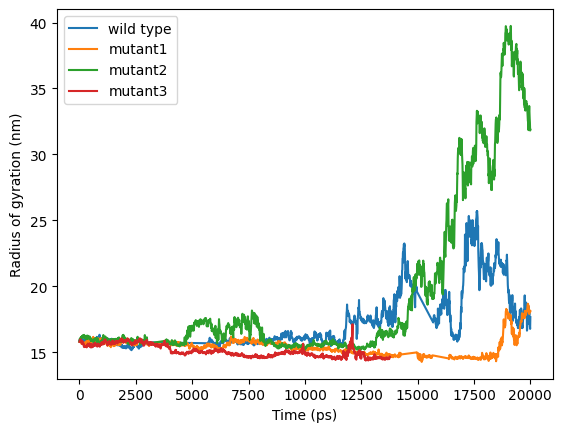

In [9]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory and topology files for all systems
u1 = mda.Universe('/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-wt-20ns/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-wt-20ns/md_1_all.xtc')
u2 = mda.Universe('/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-q8c-20ns/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-q8c-20ns/md_1_all.xtc')
u3 = mda.Universe('/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-r67c-20ns/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-r67c-20ns/md_1_all.xtc')
u4 = mda.Universe('/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-n84c-20ns/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/bcl2/bcl2-data/5n20-n84c-20ns/md_1_all.xtc')

# Select only protein atoms
protein_sel1 = u1.select_atoms('protein')
protein_sel2 = u2.select_atoms('protein')
protein_sel3 = u3.select_atoms('protein')
protein_sel4 = u4.select_atoms('protein')

# Initialize arrays to store Rg values and time
Rg1 = np.zeros(len(u1.trajectory))
Rg2 = np.zeros(len(u2.trajectory))
Rg3 = np.zeros(len(u3.trajectory))
Rg4 = np.zeros(len(u4.trajectory))
time1 = np.zeros(len(u1.trajectory))
time2 = np.zeros(len(u2.trajectory))
time3 = np.zeros(len(u3.trajectory))
time4 = np.zeros(len(u4.trajectory))

# Loop over all frames in trajectory and calculate Rg
for ts in u1.trajectory:
    Rg1[ts.frame] = protein_sel1.radius_of_gyration()
    time1[ts.frame] = u1.trajectory.time

for ts in u2.trajectory:
    Rg2[ts.frame] = protein_sel2.radius_of_gyration()
    time2[ts.frame] = u2.trajectory.time

for ts in u3.trajectory:
    Rg3[ts.frame] = protein_sel3.radius_of_gyration()
    time3[ts.frame] = u3.trajectory.time

for ts in u4.trajectory:
    Rg4[ts.frame] = protein_sel4.radius_of_gyration()
    time4[ts.frame] = u4.trajectory.time

# Plot Rg values of all systems on the same plot
fig, ax = plt.subplots()
ax.plot(time1, Rg1, label='wild type')
ax.plot(time2, Rg2, label='mutant1')
ax.plot(time3, Rg3, label='mutant2')
ax.plot(time4, Rg4, label='mutant3')
ax.set_xlabel('Time (ps)')
ax.set_ylabel('Radius of gyration (nm)')
ax.legend()

# Save the plot as a high-resolution PNG image
fig.savefig('rg.png', dpi=300)

plt.show()


# 4 Essential Dynamics (single trajectory)
- Clustering
- Cartesian Coordinate PCA
- Pairwise Distance PCA
- Solvent Accesible Surface Area

## 4.1 Reading Data

In [10]:
# import mdanalysis
import MDAnalysis as mda
u = mda.Universe('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/md_1_all.xtc')

# atom selection
import MDAnalysis as mda
u = mda.Universe('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/6wzu_solv_ions.pdb', '/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/md_1_all.xtc')
ag = u.select_atoms("name CA")
ag.write("c-alpha.pdb")

# Pass in the frames keyword to write out trajectories.
ag.write('c-alpha_all.xtc', frames='all')

# Slice or index the trajectory to choose which frames to write:
ag.write('c-alpha_skip2.trr', frames=u.trajectory[::2])
ag.write('c-alpha_some.dcd', frames=u.trajectory[[0,2,3]])

# Alternatively, iterate over the trajectory frame-by-frame with Writer(). This requires you to pass in the number of atoms to write.
with mda.Writer('c-alpha.xyz', ag.n_atoms) as w:
    for ts in u.trajectory:
        w.write(ag)


# load calpha
import mdtraj as md
t = md.load('c-alpha_all.xtc', top='c-alpha.pdb')
print(t)

# lets take a look at the first ten frames
print(t[1:10])

# lets take a look at the last ten frames
print(t[-10:])

# or maybe the last frame?
print(t[-1])

# print xyz
print(t.xyz.shape)


# the simulation time (in picoseconds) of the first 10 frames
print(t.time[0:10])


# the simulation time (in picoseconds) of th last 10 frames
print(t.time[-10:])

# or the unitcell lengths in the last frame? (in nanometers of course)
t.unitcell_lengths[-1]

# the hdf5 format stores the topology inside the file for convenience
t[::2].save('halftraj.h5')


# the hdf5 format stores the topology inside the file for convenience
t[-10:].save('last10f-traj.h5')

# the hdf5 format stores the topology inside the file for convenience
t[-1000:].save('last1000f-traj.h5')


# the hdf5 format stores the topology inside the file for convenience
t[-1000:].save('last100f-traj.h5')

# the format will be parsed based on the extension, or you can call the
# format-specific save methods
t[0:10].save_dcd('first-ten-frames.dcd')

# the format will be parsed based on the extension, or you can call the
# format-specific save methods
t[-10:].save_dcd('last-ten-frames.dcd')

# the format will be parsed based on the extension, or you can call the
# format-specific save methods
t[-10:].save_dcd('last-ten-frames.dcd')

# atom keeping
atoms_to_keep = [a.index for a in t.topology.atoms if a.name == 'CA']
t.restrict_atoms(atoms_to_keep)  # this acts inplace on the trajectory
t.save('CA-only.h5')

/usr/local/lib/python3.10/dist-packages/MDAnalysis/coordinates/PDB.py:1151: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/usr/local/lib/python3.10/dist-packages/MDAnalysis/coordinates/PDB.py:1198: UserWarning: Found missing chainIDs. Corresponding atoms will use value of 'X'
  warnings.warn("Found missing chainIDs."


<mdtraj.Trajectory with 9156 frames, 230 atoms, 230 residues, and unitcells>
<mdtraj.Trajectory with 9 frames, 230 atoms, 230 residues, and unitcells>
<mdtraj.Trajectory with 10 frames, 230 atoms, 230 residues, and unitcells>
<mdtraj.Trajectory with 1 frames, 230 atoms, 230 residues, and unitcells>
(9156, 230, 3)
[ 0. 10. 20. 30. 40. 50. 60. 70. 80. 90.]
[ 99910.  99920.  99930.  99940.  99950.  99960.  99970.  99980.  99990.
 100000.]


## 4.2 Atom Selection

In [11]:
# atom selection
from __future__ import print_function
import mdtraj as md

traj = md.load('CA-only.h5')
print(traj)


# how many atoms
print('How many atoms?    %s' % traj.n_atoms)
print('How many residues? %s' % traj.n_residues)

# frame index
frame_idx = 4 # zero indexed frame number
atom_idx = 9 # zero indexed atom index
print('Where is the fifth atom at the tenth frame?')
print('x: %s\ty: %s\tz: %s' % tuple(traj.xyz[frame_idx, atom_idx,:]))

# topology
topology = traj.topology
print(topology)

# fifth atom?
print('Fifth atom: %s' % topology.atom(4))
print('All atoms: %s' % [atom for atom in topology.atoms])

# residue
print('Second residue: %s' % traj.topology.residue(1))
print('All residues: %s' % [residue for residue in traj.topology.residues])

# atom topology
atom = topology.atom(10)
print('''Hi! I am the %sth atom, and my name is %s. 
I am a %s atom with %s bonds. 
I am part of an %s residue.''' % ( atom.index, atom.name, atom.element.name, atom.n_bonds, atom.residue.name))

/usr/local/lib/python3.10/dist-packages/mdtraj/core/trajectory.py:438: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


<mdtraj.Trajectory with 9156 frames, 230 atoms, 230 residues, and unitcells>
How many atoms?    230
How many residues? 230
Where is the fifth atom at the tenth frame?
x: 6.176	y: 5.2630005	z: 4.0090003
<mdtraj.Topology with 1 chains, 230 residues, 230 atoms, 0 bonds>
Fifth atom: TYR5-CA
All atoms: [ALA1-CA, LYS2-CA, ARG3-CA, GLY4-CA, TYR5-CA, SER6-CA, PHE7-CA, SER8-CA, LEU9-CA, THR10-CA, THR11-CA, PHE12-CA, SER13-CA, PRO14-CA, SER15-CA, GLY16-CA, LYS17-CA, LEU18-CA, VAL19-CA, GLN20-CA, ILE21-CA, GLU22-CA, TYR23-CA, ALA24-CA, LEU25-CA, ALA26-CA, ALA27-CA, VAL28-CA, ALA29-CA, GLY30-CA, GLY31-CA, ALA32-CA, PRO33-CA, SER34-CA, VAL35-CA, GLY36-CA, ILE37-CA, LYS38-CA, ALA39-CA, ALA40-CA, ASN41-CA, GLY42-CA, VAL43-CA, VAL44-CA, LEU45-CA, ALA46-CA, THR47-CA, GLU48-CA, LYS49-CA, LYS50-CA, GLN51-CA, LYS52-CA, SER53-CA, ILE54-CA, LEU55-CA, TYR56-CA, ASP57-CA, GLU58-CA, ARG59-CA, SER60-CA, VAL61-CA, HIS62-CA, LYS63-CA, VAL64-CA, GLU65-CA, PRO66-CA, ILE67-CA, THR68-CA, LYS69-CA, HIS70-CA, ILE71-CA,

## 4.3 Put Everything Together

In [12]:
# atom index
print([atom.index for atom in topology.atoms if atom.element.symbol is 'C' and atom.is_sidechain])

# residue
print([residue for residue in topology.chain(0).residues if residue.index % 2 == 0])



[]
[ALA1, ARG3, TYR5, PHE7, LEU9, THR11, SER13, SER15, LYS17, VAL19, ILE21, TYR23, LEU25, ALA27, ALA29, GLY31, PRO33, VAL35, ILE37, ALA39, ASN41, VAL43, LEU45, THR47, LYS49, GLN51, SER53, LEU55, ASP57, ARG59, VAL61, LYS63, GLU65, ILE67, LYS69, ILE71, LEU73, TYR75, GLY77, GLY79, ASP81, ARG83, LEU85, HIS87, ALA89, LYS91, ALA93, GLN95, TYR97, VAL99, GLN101, PRO103, PRO105, ALA107, LEU109, GLN111, VAL113, SER115, MET117, GLU119, THR121, SER123, GLY125, ARG127, PHE129, VAL131, LEU133, ILE135, GLY137, ASN139, GLY141, PRO143, LEU145, GLN147, ASP149, SER151, ALA153, PHE155, TRP157, ALA159, ALA161, GLY163, ASN165, VAL167, GLY169, THR171, LEU173, LYS175, TYR177, GLU179, LEU181, LEU183, ASP185, ILE187, THR189, ILE191, THR193, LYS195, SER197, GLU199, GLN201, THR203, ASP205, ILE207, VAL209, ILE211, ASN213, ALA215, PHE217, ARG219, THR221, THR223, VAL225, ASP227, LEU229]


<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-12-3670c97da792>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  print([atom.index for atom in topology.atoms if atom.element.symbol is 'C' and atom.is_sidechain])


## 4.4 Atom selection language

In [13]:
# topology
print(topology.select('resid 1 to 2'))

# backbone
print(topology.select('name N and backbone'))

# selection
selection = topology.select_expression('name CA and resid 1 to 2')
print(selection)

[1 2]
[]
[atom.index for atom in topology.atoms if ((atom.name == 'CA') and (1 <= atom.residue.index <= 2))
]


# 5 Clustering 
with md.rmsd() and scipy.cluster.hierarchy()


In [14]:
# importing
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform

# load trajectory
traj = md.load('CA-only.h5')

# compute pairwise rmsd between conformations
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i)
print('Max pairwise rmsd: %f nm' % np.max(distances))

# Clustering only accepts reduced form. Squareform's checks are too stringent
# when calculating a massinve numer of frames initially it was 1e-6; changed to 1e6 and the plot generated.
assert np.all(distances - distances.T < 1e6)
reduced_distances = squareform(distances, checks=False)

# linkage
linkage = scipy.cluster.hierarchy.linkage(reduced_distances, method='average')

Max pairwise rmsd: 5.387807 nm


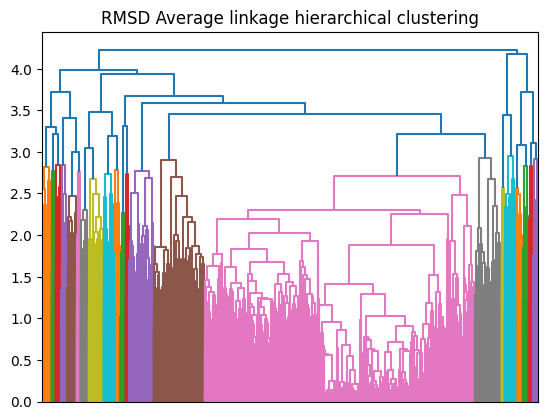

In [15]:
plt.title('RMSD Average linkage hierarchical clustering')
_ = scipy.cluster.hierarchy.dendrogram(linkage, no_labels=True, count_sort='descendent')

# save the plot as a PNG file
plt.savefig('RMSD Average linkage hierarchical clustering.png', dpi=300)

# show the plot
plt.show()

# 6 PCA
Principal components analysis (PCA) with scikit-learn



In [16]:
# importing
%matplotlib inline
from __future__ import print_function
import mdtraj as md
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# load trajectory
traj = md.load('CA-only.h5')
traj

# pca
pca1 = PCA(n_components=2)
traj.superpose(traj, 0)

# cartesian
reduced_cartesian = pca1.fit_transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms * 3))
print(reduced_cartesian.shape)

/usr/local/lib/python3.10/dist-packages/mdtraj/core/trajectory.py:438: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


(9156, 2)


### 6.1 Cartesian Coordinate PCA

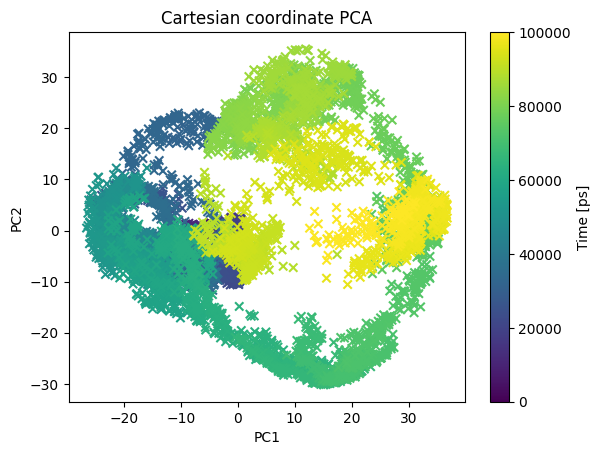

In [17]:
plt.figure()
plt.scatter(reduced_cartesian[:, 0], reduced_cartesian[:,1], marker='x', c=traj.time)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cartesian coordinate PCA')
cbar = plt.colorbar()
cbar.set_label('Time [ps]')

# save the plot as a PNG file
plt.savefig('Cartesian coordinate PCA', dpi=300)

# show the plot
plt.show()

### 6.2 Pairwise Distance PCA

In [18]:
pca2 = PCA(n_components=2)

from itertools import combinations
# this python function gives you all unique pairs of elements from a list

atom_pairs = list(combinations(range(traj.n_atoms), 2))
pairwise_distances = md.geometry.compute_distances(traj, atom_pairs)
print(pairwise_distances.shape)
reduced_distances = pca2.fit_transform(pairwise_distances)

(9156, 26335)


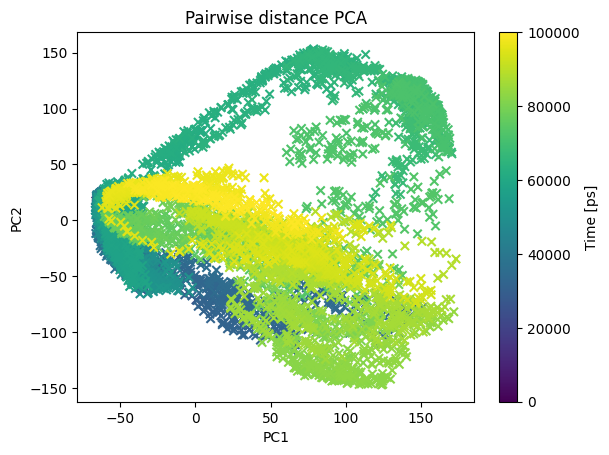

In [19]:
plt.figure()
plt.scatter(reduced_distances[:, 0], reduced_distances[:,1], marker='x', c=traj.time)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Pairwise distance PCA')
cbar = plt.colorbar()
cbar.set_label('Time [ps]')

# save the plot as a PNG file
plt.savefig('Pairwise distance PCA', dpi=300)

# show the plot
plt.show()

# 7 SASA
Solvent Accesible Surface Area

In [20]:
# importing
from __future__ import print_function
%matplotlib inline
import numpy as np
import mdtraj as md

# rupley
help(md.shrake_rupley)

# load trajectory
trajectory = md.load('CA-only.h5')
sasa = md.shrake_rupley(trajectory)

print(trajectory)
print('sasa data shape', sasa.shape)

# total sasa
total_sasa = sasa.sum(axis=1)
print(total_sasa.shape)

Help on function shrake_rupley in module mdtraj.geometry.sasa:

shrake_rupley(traj, probe_radius=0.14, n_sphere_points=960, mode='atom', change_radii=None, get_mapping=False)
    Compute the solvent accessible surface area of each atom or residue in each simulation frame.
    
    Parameters
    ----------
    traj : Trajectory
        An mtraj trajectory.
    probe_radius : float, optional
        The radius of the probe, in nm.
    n_sphere_points : int, optional
        The number of points representing the surface of each atom, higher
        values leads to more accuracy.
    mode : {'atom', 'residue'}
        In mode == 'atom', the extracted areas are resolved per-atom
        In mode == 'residue', this is consolidated down to the
        per-residue SASA by summing over the atoms in each residue.
    change_radii : dict, optional
        A partial or complete dict containing the radii to change from the 
        defaults. Should take the form {"Symbol" : radii_in_nm }, e.g. 
   

/usr/local/lib/python3.10/dist-packages/mdtraj/core/trajectory.py:438: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


<mdtraj.Trajectory with 9156 frames, 230 atoms, 230 residues, and unitcells>
sasa data shape (9156, 230)
(9156,)


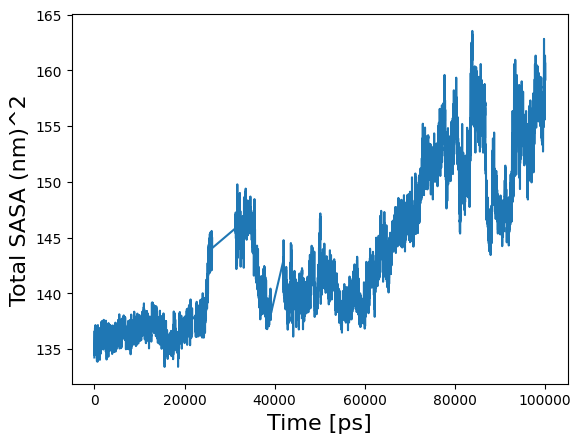

In [21]:
from matplotlib.pylab import *

plot(trajectory.time, total_sasa)
xlabel('Time [ps]', size=16)
ylabel('Total SASA (nm)^2', size=16)


# save the plot as a PNG file
plt.savefig('Total_SASA.png', dpi=300)

# show the plot
plt.show()

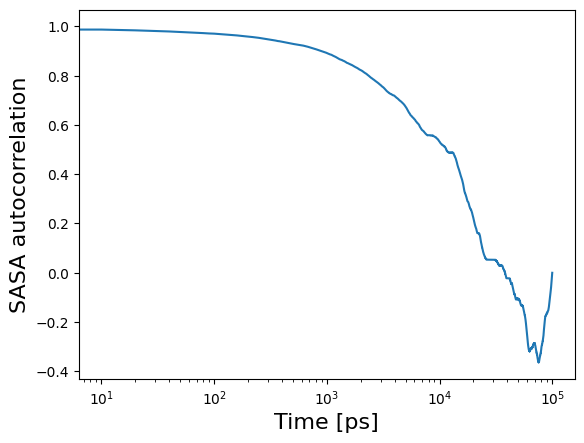

In [22]:
def autocorr(x):
    "Compute an autocorrelation with numpy"
    x = x - np.mean(x)
    result = np.correlate(x, x, mode='full')
    result = result[result.size//2:]
    return result / result[0]

semilogx(trajectory.time, autocorr(total_sasa))
xlabel('Time [ps]', size=16)
ylabel('SASA autocorrelation', size=16)
show()

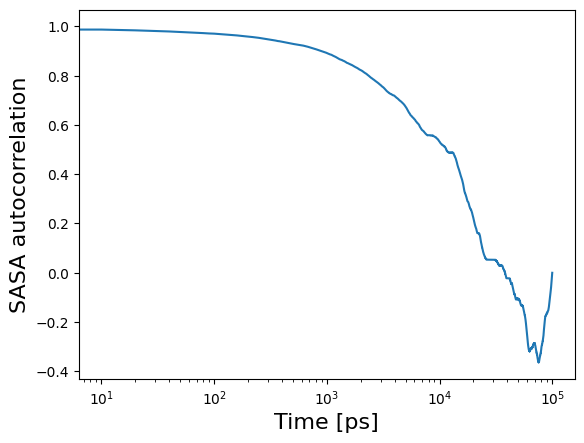

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def autocorr(x):
    "Compute an autocorrelation with numpy"
    x = x - np.mean(x)
    result = np.correlate(x, x, mode='full')
    result = result[result.size//2:]
    return result / result[0]

plt.semilogx(trajectory.time, autocorr(total_sasa))
plt.xlabel('Time [ps]', size=16)
plt.ylabel('SASA autocorrelation', size=16)
plt.savefig('sasa_autocorrelation.png')
plt.show()


# Misc. Concatenation of XTCs

## installation


In [ ]:
# It is recommended (and required for GROMACS 2021) to upgrade cmake
!pip install cmake --upgrade

# Download and unzip the compressed folder of GROMACS 2020.6 version
!wget https://raw.githubusercontent.com/pb3lab/ibm3202/master/software/gromacs.tar.gz
!tar xzf gromacs.tar.gz

# If you get : gmx: error while loading shared libraries: libhwloc.so.5: cannot open shared object file: No such file or directory
!wget https://download.open-mpi.org/release/hwloc/v1.11/hwloc-1.11.13.tar.gz
!tar xzf hwloc-1.11.13.tar.gz
!cd /content/hwloc-1.11.13
! /content/hwloc-1.11.13/configure
!make
!sudo make install

#Installing py3Dmol using pip
!pip install py3Dmol

#Importing py3Dmol for safety
import py3Dmol

#Installing biopython using pip
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: cmake
    Found existing installation: cmake 3.25.2
    Uninstalling cmake-3.25.2:
      Successfully uninstalled cmake-3.25.2
--2023-04-28 15:16:03--  https://raw.githubusercontent.com/pb3lab/ibm3202/master/software/gromacs.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35608971 (34M) [application/octet-stream]
Saving to: ‘gromacs.tar.gz’

gromacs.tar.gz      100%[===================>]  33.96M  99.8MB/s    in 0.3s    

2023-04-28 15:16:04 (99.8 MB/s) - ‘gromacs.tar.gz’ saved [35608971/35608971]

--2023-04-28 15:16:07--  https://download.open-mpi.org

In [ ]:
# Checking that our GROMACS works
%%bash
source /content/gromacs/bin/GMXRC
gmx -h

SYNOPSIS

gmx [-[no]h] [-[no]quiet] [-[no]version] [-[no]copyright] [-nice <int>]
    [-[no]backup]

OPTIONS

Other options:

 -[no]h                     (no)
           Print help and quit
 -[no]quiet                 (no)
           Do not print common startup info or quotes
 -[no]version               (no)
           Print extended version information and quit
 -[no]copyright             (yes)
           Print copyright information on startup
 -nice   <int>              (19)
           Set the nicelevel (default depends on command)
 -[no]backup                (yes)
           Write backups if output files exist

Additional help is available on the following topics:
    commands    List of available commands
    selections  Selection syntax and usage
To access the help, use 'gmx help <topic>'.
For help on a command, use 'gmx help <command>'.


                         :-) GROMACS - gmx, 2020.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
        M

In [ ]:
#We will constantly need to source GMXRC for GROMACS to work
%%bash
source /content/gromacs/bin/GMXRC

#Try gmx here!


In [ ]:
!pwd

/content/gdrive/MyDrive/works/psmb8/5l5a/5l5a_wt_100ns


## concatenation


In [ ]:
%%time
%%bash
#Concatenation of xtc files
source /content/gromacs/bin/GMXRC
gmx trjcat -f md_1.xtc md_1.part0002.xtc md_1.part0003.xtc md_1.part0004.xtc md_1.part0005.xtc md_1.part0006.xtc md_1.part0007.xtc md_1.part0008.xtc md_1.part0009.xtc md_1.part0010.xtc md_1.part0011.xtc md_1.part0012.xtc md_1.part0013.xtc md_1.part0014.xtc -o md_1_all.xtc


Note that major changes are planned in future for trjcat, to improve usability and utility.
lasttime 0

lasttime 5800

lasttime 7560

lasttime 8620

lasttime 11660

lasttime 29100

lasttime 39940

lasttime 46530

lasttime 54210

lasttime 55420

lasttime 61150

lasttime 69680

lasttime 78570

lasttime 90130


                      :-) GROMACS - gmx trjcat, 2020.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
     

CPU times: user 743 ms, sys: 125 ms, total: 868 ms
Wall time: 2min 6s


# 08 GROMACS ENERGIES (PYTHON)

## 8.1 Potential

In [ ]:
pwd

'/content/gdrive/MyDrive/works/psmb8/3unf'

<ipython-input-13-69bffb4523a8>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


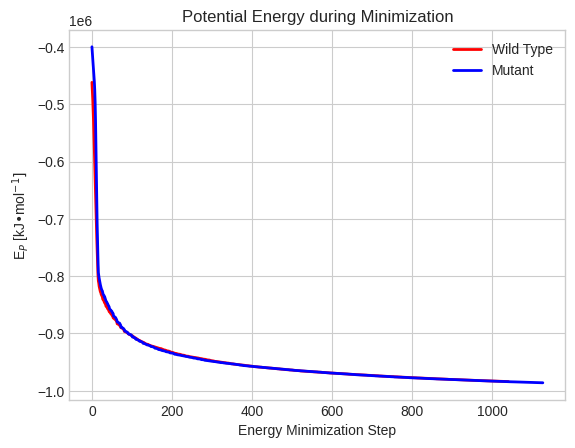

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Wild type potential energy file
wild_type_data = np.loadtxt('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/em_potential.xvg')

# Mutant potential energy file
mutant_data = np.loadtxt('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/em_potential.xvg')

plt.title('Potential Energy during Minimization')
plt.xlabel('Energy Minimization Step')
plt.ylabel(r'E$_P$ [kJ•mol$^{-1}]$')

# Plotting wild type potential energy
plt.plot(wild_type_data[:,0], wild_type_data[:,1], linestyle='solid', linewidth='2', color='red', label='Wild Type')

# Plotting mutant potential energy
plt.plot(mutant_data[:,0], mutant_data[:,1], linestyle='solid', linewidth='2', color='blue', label='Mutant')

plt.legend()

# Save the plot as an image file (e.g., PNG)
plt.savefig('potential_plot.png')

# Show the plot
plt.show()


## 8.2 Temperature

<ipython-input-10-c49bf0295794>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


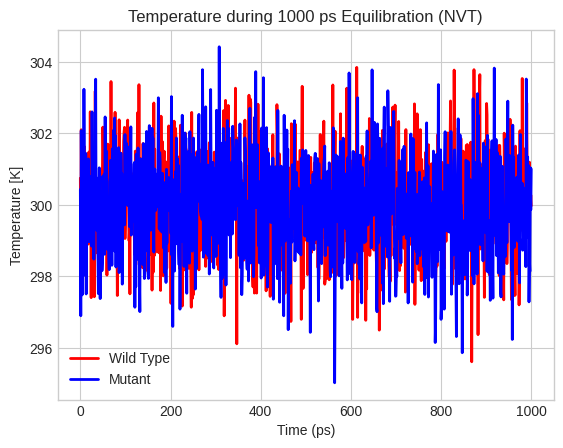

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Wild type temperature file
wild_type_data = np.loadtxt('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/nvt_temp.xvg')

# Mutant temperature file
mutant_data = np.loadtxt('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/nvt_temp.xvg')

plt.title('Temperature during 1000 ps Equilibration (NVT)')
plt.xlabel('Time (ps)')
plt.ylabel('Temperature [K]')

# Plotting wild type temperature
plt.plot(wild_type_data[:,0], wild_type_data[:,1], linestyle='solid', linewidth='2', color='red', label='Wild Type')

# Plotting mutant temperature
plt.plot(mutant_data[:,0], mutant_data[:,1], linestyle='solid', linewidth='2', color='blue', label='Mutant')

plt.legend()

# Save the plot as an image file (e.g., PNG)
plt.savefig('temperature_plot.png')

# Show the plot
plt.show()


## 8.3 Pressure

<ipython-input-11-067eba129480>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


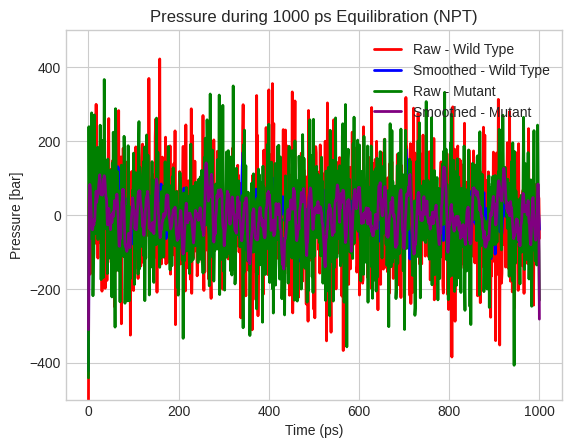

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Wild type pressure file
wild_type_data = np.loadtxt('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/npt_press_dens.xvg')

# Mutant pressure file
mutant_data = np.loadtxt('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/npt_press_dens.xvg')

plt.title('Pressure during 1000 ps Equilibration (NPT)')
plt.xlabel('Time (ps)')
plt.ylabel('Pressure [bar]')
plt.ylim(-500,500)

# Smoothing using Savitzky-Golay
from scipy.signal import savgol_filter
wild_type_smoothed = savgol_filter(wild_type_data[:,1], 21, 5)
mutant_smoothed = savgol_filter(mutant_data[:,1], 21, 5)

# Plotting raw data and smoothed data for wild type
plt.plot(wild_type_data[:,0], wild_type_data[:,1], linestyle='solid', linewidth='2', color='red', label='Raw - Wild Type')
plt.plot(wild_type_data[:,0], wild_type_smoothed, linestyle='solid', linewidth='2', color='blue', label='Smoothed - Wild Type')

# Plotting raw data and smoothed data for mutant
plt.plot(mutant_data[:,0], mutant_data[:,1], linestyle='solid', linewidth='2', color='green', label='Raw - Mutant')
plt.plot(mutant_data[:,0], mutant_smoothed, linestyle='solid', linewidth='2', color='purple', label='Smoothed - Mutant')

plt.legend()

# Save the plot as an image file (e.g., PNG)
plt.savefig('pressure_plot.png')

# Show the plot
plt.show()


## 8.4 Density

<ipython-input-12-e84b735e1ab3>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


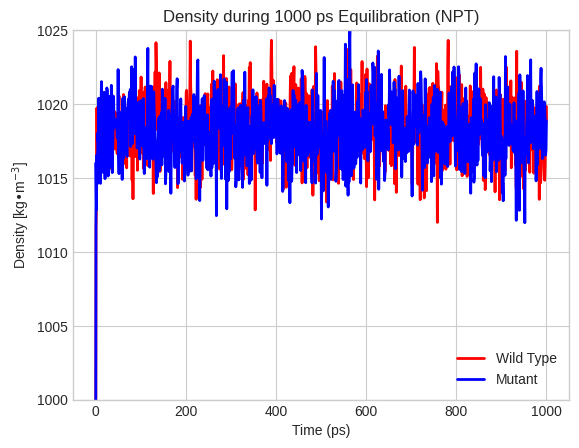

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Wild type density file
wild_type_data = np.loadtxt('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/npt_press_dens.xvg')

# Mutant density file
mutant_data = np.loadtxt('/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/npt_press_dens.xvg')

plt.title('Density during 1000 ps Equilibration (NPT)')
plt.xlabel('Time (ps)')
plt.ylabel('Density [kg•m$^{-3}$]')
plt.ylim(1000,1025)

# Plotting wild type density
plt.plot(wild_type_data[:,0], wild_type_data[:,2], linestyle='solid', linewidth='2', color='red', label='Wild Type')

# Plotting mutant density
plt.plot(mutant_data[:,0], mutant_data[:,2], linestyle='solid', linewidth='2', color='blue', label='Mutant')

plt.legend()

# Save the plot as an image file (e.g., PNG)
plt.savefig('density_plot.png')

# Show the plot
plt.show()


# 08 GROMACS ENERGIES (GNUPLOT)

8.1 Installation

In [ ]:
!pwd

/content


In [ ]:
# Install gnuplot
!sudo apt-get install gnuplot-x11


Reading package lists... Done
Building dependency tree       
Reading state information... Done
gnuplot-x11 is already the newest version (5.2.8+dfsg1-2).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


## 8.1 Density

In [ ]:
# Set the file path of your data
data_file = '/content/gdrive/MyDrive/works/1aki/theromdynamics/density_copy.xvg'

# Set the plot title, axis labels, and output file name
plot_title = 'Density vs Time'
x_label = 'Time (ps)'
y_label = 'Density (kg/m³)'
output_file = 'density_plot.png'

# Set the plot size and DPI
plot_width = 800
plot_height = 600
dpi = 300

# Define the gnuplot code as a string
gnuplot_code = f"""
set term pngcairo enhanced font 'Arial,14' size {plot_width},{plot_height} fontscale 1.0
set output '{output_file}'
set title "{plot_title}"
set xlabel "{x_label}"
set ylabel "{y_label}"
plot '{data_file}' with lines lw 2 lc rgb "blue"
"""

# Write the gnuplot code to a temporary file
with open('density_plot.gnuplot', 'w') as f:
    f.write(gnuplot_code)

# Run gnuplot and display the resulting plot
!gnuplot density_plot.gnuplot

# Save the plot as a high-resolution file
from PIL import Image
img = Image.open(output_file)
img.save('density_plot_highres.png', dpi=(dpi, dpi))

# Display the plot inline
from IPython.display import Image
Image(filename=output_file)

# Display the high-resolution plot
Image(filename='density_plot_highres.png')


## 8.2 Potential

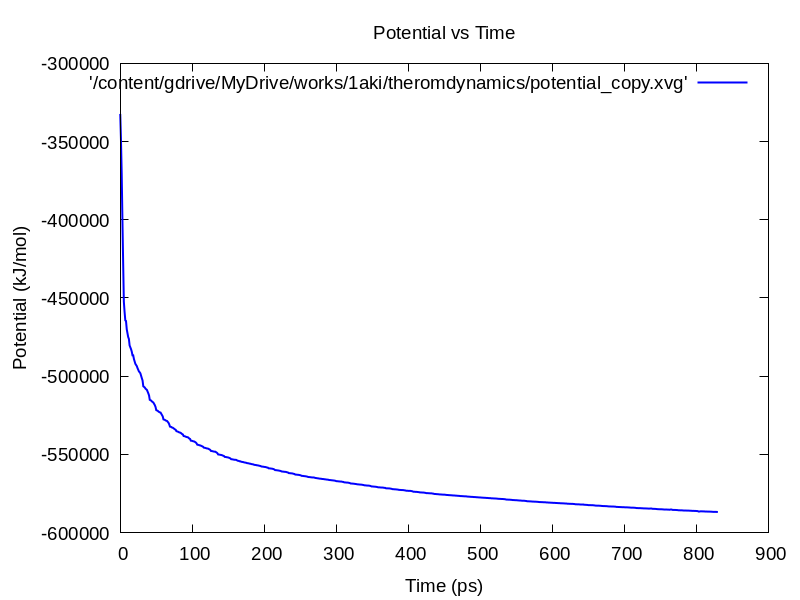

In [ ]:
# Set the file path of your data
data_file = '/content/gdrive/MyDrive/works/1aki/theromdynamics/potential_copy.xvg'

# Set the plot title, axis labels, and output file name
plot_title = 'Potential vs Time'
x_label = 'Time (ps)'
y_label = 'Potential (kJ/mol)'
output_file = 'potential_plot.png'

# Set the plot size and DPI
plot_width = 800
plot_height = 600
dpi = 300

# Define the gnuplot code as a string
gnuplot_code = f"""
set term pngcairo enhanced font 'Arial,14' size {plot_width},{plot_height} fontscale 1.0
set output '{output_file}'
set title "{plot_title}"
set xlabel "{x_label}"
set ylabel "{y_label}"
plot '{data_file}' with lines lw 2 lc rgb "blue"
"""

# Write the gnuplot code to a temporary file
with open('potential_plot.gnuplot', 'w') as f:
    f.write(gnuplot_code)

# Run gnuplot and display the resulting plot
!gnuplot potential_plot.gnuplot

# Save the plot as a high-resolution file
from PIL import Image
img = Image.open(output_file)
img.save('potential_plot_highres.png', dpi=(dpi, dpi))

# Display the plot inline
from IPython.display import Image
Image(filename=output_file)

# Display the high-resolution plot
Image(filename='potential_plot_highres.png')


## 8.2 Pressure

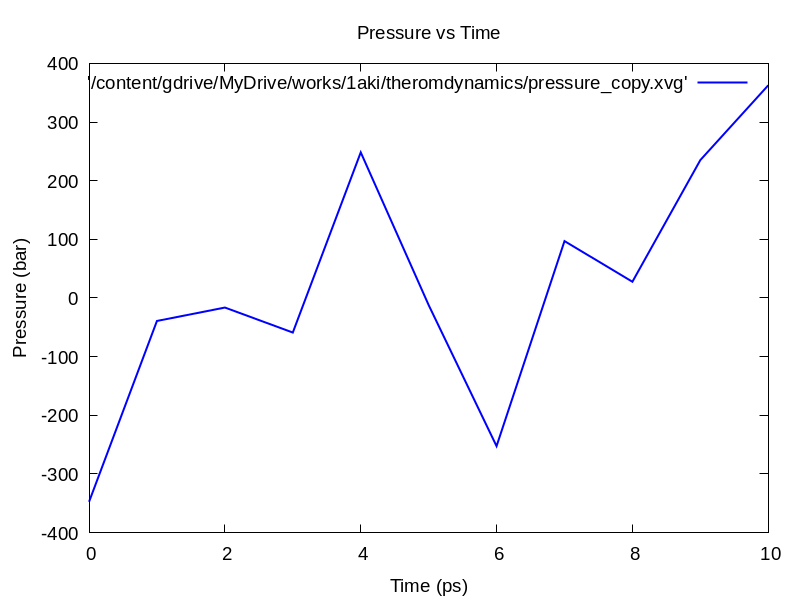

In [ ]:
# Set the file path of your data
data_file = '/content/gdrive/MyDrive/works/1aki/theromdynamics/pressure_copy.xvg'

# Set the plot title, axis labels, and output file name
plot_title = 'Pressure vs Time'
x_label = 'Time (ps)'
y_label = 'Pressure (bar)'
output_file = 'pressure_plot.png'

# Set the plot size and DPI
plot_width = 800
plot_height = 600
dpi = 300

# Define the gnuplot code as a string
gnuplot_code = f"""
set term pngcairo enhanced font 'Arial,14' size {plot_width},{plot_height} fontscale 1.0
set output '{output_file}'
set title "{plot_title}"
set xlabel "{x_label}"
set ylabel "{y_label}"
plot '{data_file}' with lines lw 2 lc rgb "blue"
"""

# Write the gnuplot code to a temporary file
with open('pressure_plot.gnuplot', 'w') as f:
    f.write(gnuplot_code)

# Run gnuplot and display the resulting plot
!gnuplot pressure_plot.gnuplot

# Save the plot as a high-resolution file
from PIL import Image
img = Image.open(output_file)
img.save('pressure_plot_highres.png', dpi=(dpi, dpi))

# Display the plot inline
from IPython.display import Image
Image(filename=output_file)

# Display the high-resolution plot
Image(filename='pressure_plot_highres.png')


## 8.2 Temperature

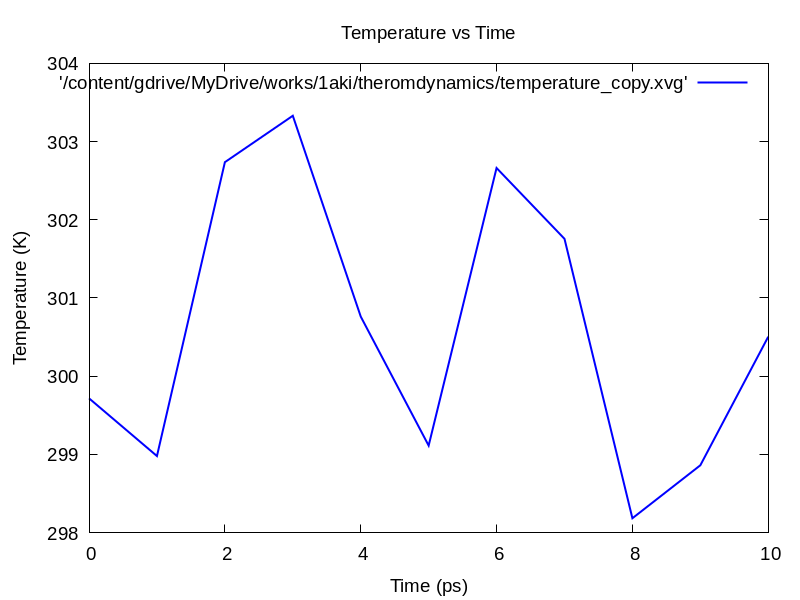

In [ ]:
# Set the file path of your data
data_file = '/content/gdrive/MyDrive/works/1aki/theromdynamics/temperature_copy.xvg'

# Set the plot title, axis labels, and output file name
plot_title = 'Temperature vs Time'
x_label = 'Time (ps)'
y_label = 'Temperature (K)'
output_file = 'temperature_plot.png'

# Set the plot size and DPI
plot_width = 800
plot_height = 600
dpi = 300

# Define the gnuplot code as a string
gnuplot_code = f"""
set term pngcairo enhanced font 'Arial,14' size {plot_width},{plot_height} fontscale 1.0
set output '{output_file}'
set title "{plot_title}"
set xlabel "{x_label}"
set ylabel "{y_label}"
plot '{data_file}' with lines lw 2 lc rgb "blue"
"""

# Write the gnuplot code to a temporary file
with open('temperature_plot.gnuplot', 'w') as f:
    f.write(gnuplot_code)

# Run gnuplot and display the resulting plot
!gnuplot temperature_plot.gnuplot

# Save the plot as a high-resolution file
from PIL import Image
img = Image.open(output_file)
img.save('temperature_plot_highres.png', dpi=(dpi, dpi))

# Display the plot inline
from IPython.display import Image
Image(filename=output_file)

# Display the high-resolution plot
Image(filename='temperature_plot_highres.png')


# DSSP_Test_230503

In [ ]:
!apt-get update
!apt-get install -y gromacs
!source /usr/local/gromacs/bin/GMXRC
!echo "0" | gmx trjconv -s 1AKI.pdb -f md_0_1.xtc -o 1aki_solv_ions.gro -b 1000 -e 1000 -pbc mol -ur compact
import MDAnalysis as mda
from MDAnalysis.analysis.secondary_structure import DSSP
u = mda.Universe('1aki_solv_ions.gro')
d = DSSP(u.select_atoms('protein'), u.trajectory[0], simplified=False)
print(d.ssd)


# FEL_Test_230504

In [ ]:
# Set up a metadynamics simulation with a Gaussian bias potential on the RMSD between the mutant and wild type protein structures

# Define the collective variable (CV) for the RMSD
cv: RMSD {
  reference: /content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/6wzu_clean.pdb # path to the PDB file of the wild type protein structure
  selection: /content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100/3unf_mutated_g210v.pdb # path to the PDB file of the mutant protein structure
}

# Set up the metadynamics simulation
metad: METAD {
  cv: RMSD
  hills: 50
  gaussians: 1.0, 0.1
}

# Output the free energy landscape
PRINT STRIDE=10 ARG=cv.bias FILE=COLVAR


# PCC_Test_230504

In [ ]:
pwd

'/content'

In [ ]:
import numpy as np
from prody import *
from prody.dynamics import *
from prody.ensemble import *

# Replace these file paths with your own
gro_file = '/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/6wzu_solv_ions.pdb'
xtc_file = '/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/md_1_all.xtc'

# Load protein structure from GRO file
pdb = parsePDB(gro_file, format='gro')

# Load trajectory and align to the first frame
open_xtc(xtc_file)
traj.setCoords(pdb)
traj.superpose()

# Get alpha carbons and select the first 10 residues
calphas = pdb.select('protein and name CA')
calphas_subset = calphas.select('resnum 1 to 10')

# Perform NMA analysis
n_modes = 10
nma = NMA('1AKI')
nma.buildHessian(calphas_subset)
nma.calcModes(n_modes)

# Print the first 3 non-zero eigenvalues
eigenvalues = nma.getEigvals()
for i in range(3):
    if eigenvalues[i] > 0:
        print("Eigenvalue", i+1, ":", eigenvalues[i])


@> 57424 atoms and 1 coordinate set(s) were parsed in 2.68s.
DEBUG:.prody:57424 atoms and 1 coordinate set(s) were parsed in 2.68s.


NameError: ignored

# FEP_Test_230507
Free Energy Purturbation

In [ ]:
import MDAnalysis as mda
import numpy as np
from scipy.integrate import cumtrapz
from MDAnalysis.analysis.rdf import InterRDF

# Load the simulation trajectories
wt_traj = mda.Universe("/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/6wzu_solv_ions.pdb",
                      "/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/md_1_all.xtc")
mut_traj = mda.Universe("/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/6wzu_solv_ions.pdb",
                       "/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/md_1_all.xtc")

# Define the atom selections
wt_sel = "resid 1-100 and not name H*"
mut_sel = "resid 1-100 and not name H*"

# Calculate the potential energy for the WT simulation
wt_sel_atoms = wt_traj.select_atoms(wt_sel)
wt_potential_energy = wt_traj.select_atoms(wt_sel).pot_energy().sum()

# Calculate the potential energy for the mutant simulation
mut_sel_atoms = mut_traj.select_atoms(mut_sel)
mut_potential_energy = mut_traj.select_atoms(mut_sel).pot_energy().sum()

# Calculate the potential energy differences
delta_potential_energy = mut_potential_energy - wt_potential_energy

# Calculate the cumulative free energy change using numerical integration
cumulative_free_energy = -cumtrapz(delta_potential_energy)

# Print the final free energy change
print("Free Energy Change (kcal/mol):", cumulative_free_energy[-1])


# H_Bond_Test_230507

In [ ]:
!pip install MDAnalysis==2.0.0

import MDAnalysis as mda
from MDAnalysis.analysis.hbonds import HydrogenBondAnalysis

# Load the simulation trajectories
wt_traj = mda.Universe("/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/6wzu_solv_ions.pdb",
                      "/content/gdrive/MyDrive/works/psmb8/3unf/3unf-100/md_1_all.xtc")
mut_traj = mda.Universe("/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/6wzu_solv_ions.pdb",
                       "/content/gdrive/MyDrive/works/psmb8/3unf/3unf-g210v-100-10/md_1_all.xtc")

# Define the atom selections for hydrogen bond analysis
donor_sel = "protein and resid 1-100 and name N"
acceptor_sel = "protein and resid 1-100 and (name O or name N)"

# Create the HydrogenBondAnalysis objects for WT and mutant simulations
wt_hbonds = HydrogenBondAnalysis(wt_traj)
wt_hbonds.set_atoms(donor_sel, acceptor_sel)

mut_hbonds = HydrogenBondAnalysis(mut_traj)
mut_hbonds.set_atoms(donor_sel, acceptor_sel)

# Run the hydrogen bond analysis
wt_hbonds.run()
mut_hbonds.run()

# Obtain the results
wt_hbond_table = wt_hbonds.count_by_type()
mut_hbond_table = mut_hbonds.count_by_type()

# Print the hydrogen bond information
print("WT Hydrogen Bonds:")
print(wt_hbond_table)
print("\nMutant Hydrogen Bonds:")
print(mut_hbond_table)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for MDAnalysis: filename=MDAnalysis-2.0.0-cp310-cp310-linux_x86_64.whl size=5874931 sha256=0ce3c8404c533de329212d94d1117382b7d5f1ac8aafcb6e4b0d8f130f72a9cb
  Stored in directory: /root/.cache/pip/wheels/d3/1d/97/0bd2e71f143c9d17ce2b16ca294428fd15ecdb831184408feb
Successfully built MDAnalysis
  Attempting uninstall: MDAnalysis
    Found existing installation: MDAnalysis 2.4.3
    Uninstalling MDAnalysis-2.4.3:
      Successfully uninstalled MDAnalysis-2.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mdanalysistests 2.4.3 requires MDAnalysis==2.4.3, but you have mdanalysis 2.0.0 which is incompatible.


ImportError: ignored